# Контрольная работа
## Задание 1

Найдите все квадратные матрицы 2х2, коммутирующие с любой квадратной матрицей 2х2. То есть, найдите все такие *X* ∈ Mat₂(**R**), что *XA* = *AX* для любой *A* ∈ Mat₂(**R**).

In [2]:
from IPython.display import Image

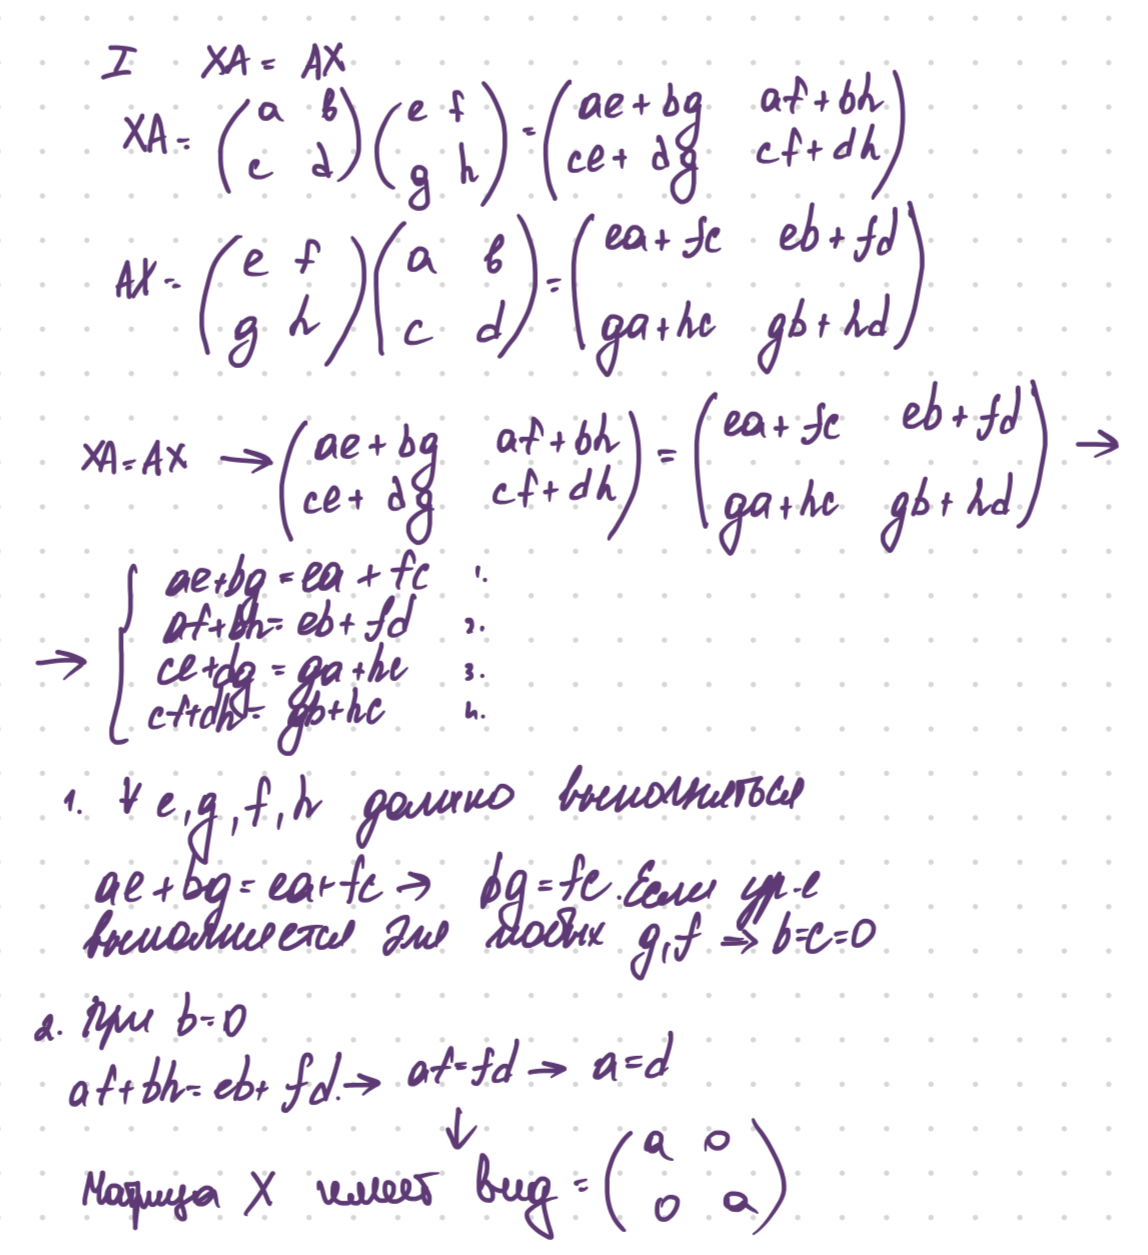

In [3]:
Image('IMG_2FC5CDF5BC35-1.jpeg')

## Задание 2

Подпространство U⊂V натянуто на векторы u и v, имеющие в некотором ортонормированном базисе компоненты v = (1,-5,1), и u = (-1,1,1) 

Найдите:
1. Систему уравнений, задающую ортогональное дополнение U⊥
2. Базис в ортогональном дополнении U⊥

In [5]:
import numpy as np

Матрица коэффициентов

In [7]:
A = np.array([[-1, 1, 1],  
             [1, -5, 1]])

Метод Гаусса

In [9]:
def gauss(A):
    m, n = A.shape
    augm = np.hstack([A, np.zeros((m, 1))]) 
    for i in range(m):
        max_row_index = np.argmax(np.abs(augm[i:, i])) + i
        augm[[i, max_row_index]] = augm[[max_row_index, i]] 
        for j in range(m):
            if i != j:
                ratio = augm[j, i] / augm[i, i]
                augm[j, :] -= ratio * augm[i, :]
    return augm[:, :-1] 

In [10]:
mat = gauss(A)
print("Сокращенная матрица (после Гаусса):")
print(mat)

Сокращенная матрица (после Гаусса):
[[-1.   0.   1.5]
 [ 0.  -4.   2. ]]


Пусть x3 свободная переменная = t

In [12]:
t = 1
x3 = t
x1 = 1.5*x3
x2 = x3/2 

basis_vector = np.array([x1, x2, x3])
print("\nБазис в ортогональном дополнении U⊥:",basis_vector)


Базис в ортогональном дополнении U⊥: [1.5 0.5 1. ]


## Задание 3

Бросаются две игральные кости. Какова вероятность того, что на первой кости выпало 1, если известно, что на второй кости выпало число очков
больше, чем на первой? Указание: примените формулу Байеса.

### Определение событий:

1. (A): Первое событие (выпадение "1" на первой кости).
2. (B): Второе событие (на второй кости выпало число больше, чем на первой).

### Подсчет вероятностей

1. **P(A)**: Вероятность того, что первая кость показывает "1":

2. **P(B|A)**: Вероятность того, что вторая кость показывает число больше "1", если первая кость показывает "1". Возможные значения для второй кости: {2, 3, 4, 5, 6}.

3. **P(B)**: Вероятность события (B) - для всех возможных значений первой кости:

- Если первая кость 1: вторая - 2, 3, 4, 5, 6.
- Если первая кость 2: вторая - 3, 4, 5, 6.
- Если первая кость 3: вторая - 4, 5, 6.
- Если первая кость 4: вторая - 5, 6.
- Если первая кость 5: вторая - 6.
- Если первая кость 6: вторая не может быть больше.

Общее количество всех возможных комбинаций (2 кости по 6 сторон) равно 36

In [16]:
P_A = 1/6
P_B_given_A = 5/6

P_B = (5+4+3+2+1)/36 

P_A_given_B = (P_B_given_A*P_A)/P_B

In [17]:
print(f"P(A|B) = {P_A_given_B:.4f}")

P(A|B) = 0.3333


## Задание 4

Сколько надо произвести бросаний правильной монеты, чтобы с вероятностью 0.99 относительная частота выпадения герба отличалась от 1/2 не
более чем на 0.01? Используйте подходящую предельную теорему.

In [19]:
import scipy.stats as stats
import math

In [20]:
a = 0.01
delta = 0.01

In [21]:
z = stats.norm.ppf(1-a/2)  # z-значение для двухстороннего теста

n = (z*(1/delta))**2
n = math.ceil(n)

print(f'Нужно бросить монету {n} раз')

Нужно бросить монету 66349 раз


## Задание 5

Найдите оценку максимального правдоподобия для параметра λ в экспоненциальном распределении.

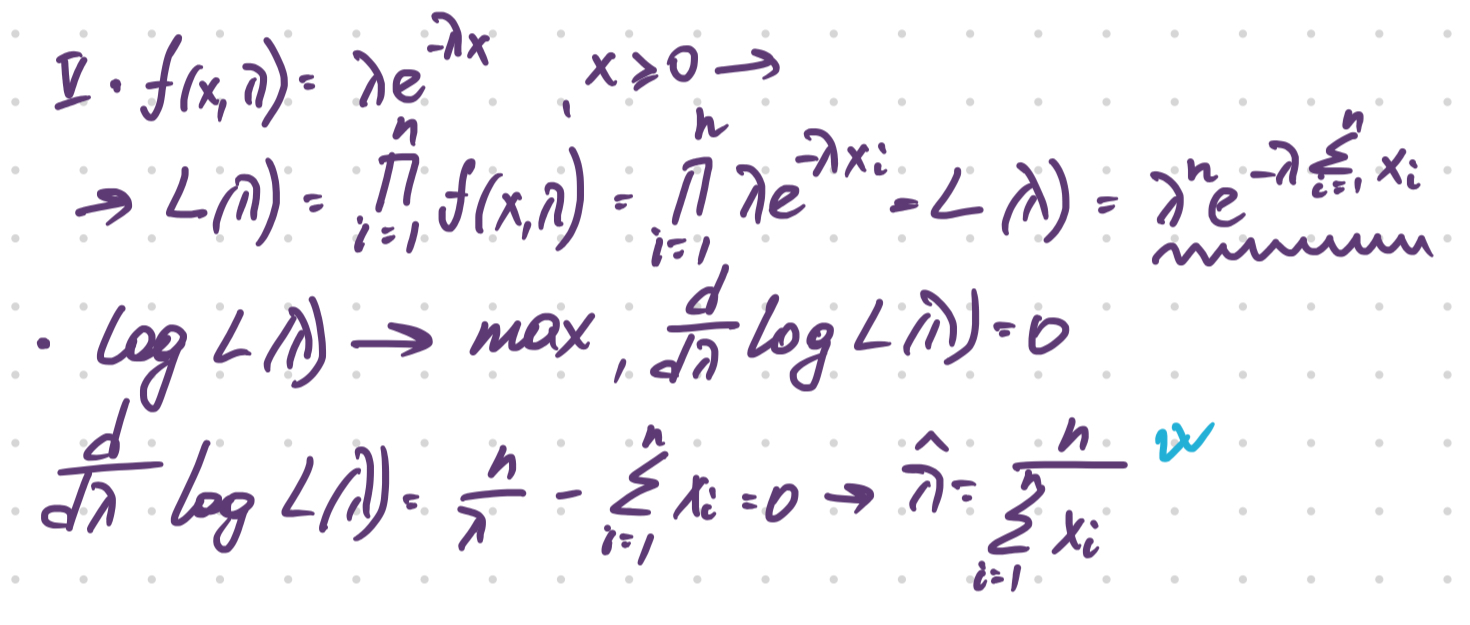

In [23]:
Image('IMG_1248.jpg')

## Задание 6

На уровне значимости a = 0,05 определите, является ли ваш (мой балл за ДЗ1 = 8) результат за первую контрольную статистически отличным от среднего по курсу.

In [25]:
grades = np.array([3, 2, 10, 5, 10, 9, 10, 10, 10, 7, 8, 8, 6, 10, 10, 10, 9, 9, 9, 10])
my_score = 8

In [26]:
mean_grade = np.mean(grades)

t_statistic, p_value = stats.ttest_1samp(grades, my_score)

a2 = 0.05 
reject_null = p_value/2 < a2  

In [27]:
print(f"Средняя оценка по курсу: {mean_grade:.2f}")
print(f"Тестовая статистика t: {t_statistic:.2f}")
print(f"P-значение: {p_value:.4f}") 

if reject_null:
    print("Отвергаем нулевую гипотезу: балл за ДЗ1 статистически отличен от среднего по курсу.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований утверждать, что мой балл за ДЗ1 статистически отличен от среднего по курсу.")

Средняя оценка по курсу: 8.25
Тестовая статистика t: 0.46
P-значение: 0.6529
Не отвергаем нулевую гипотезу: нет оснований утверждать, что мой балл за ДЗ1 статистически отличен от среднего по курсу.


## Задание 7

Найдите кратчайший путь из вершины 1 в вершину 7 и опишите алгоритм его нахождения.

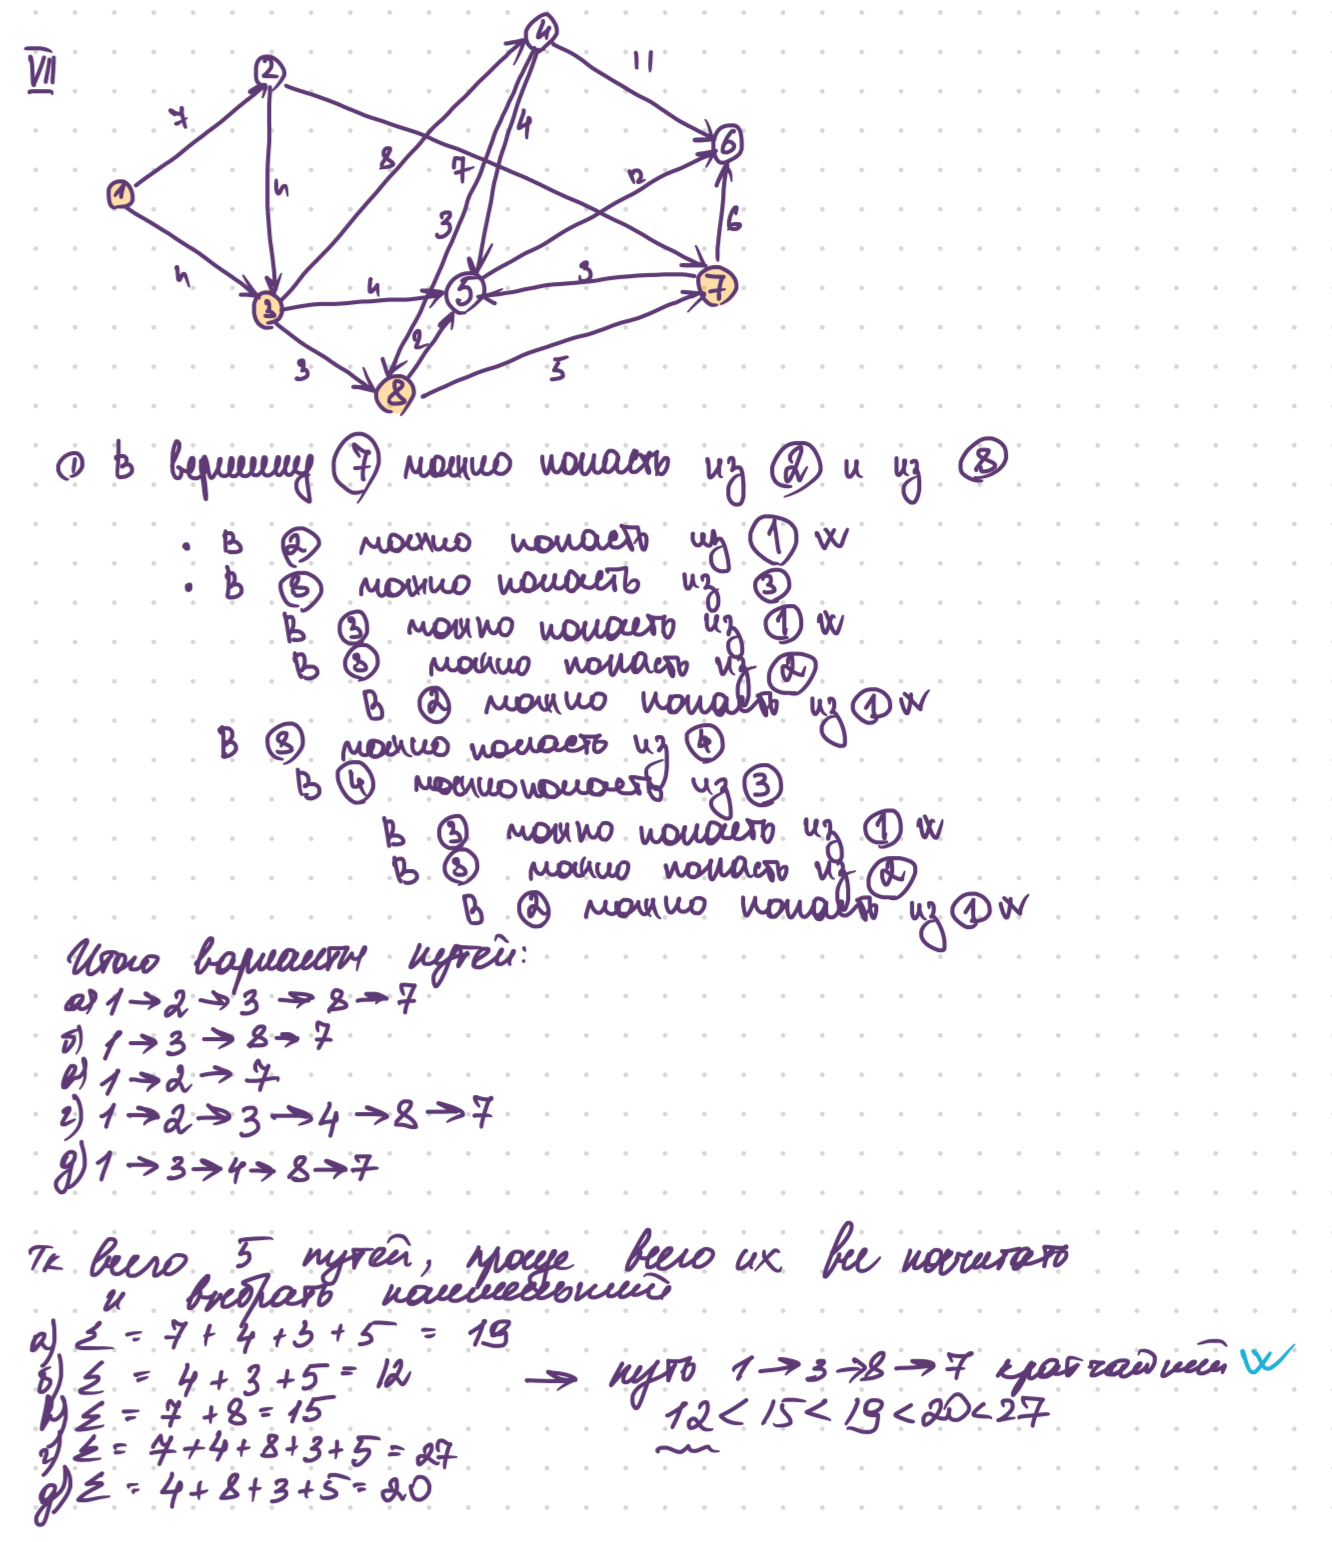

In [29]:
Image('IMG_BF05038A8BAE-1.jpeg')

## Задание 8

Найдите максимальный поток из истока 1 в сток 6 выделенного подграфа.

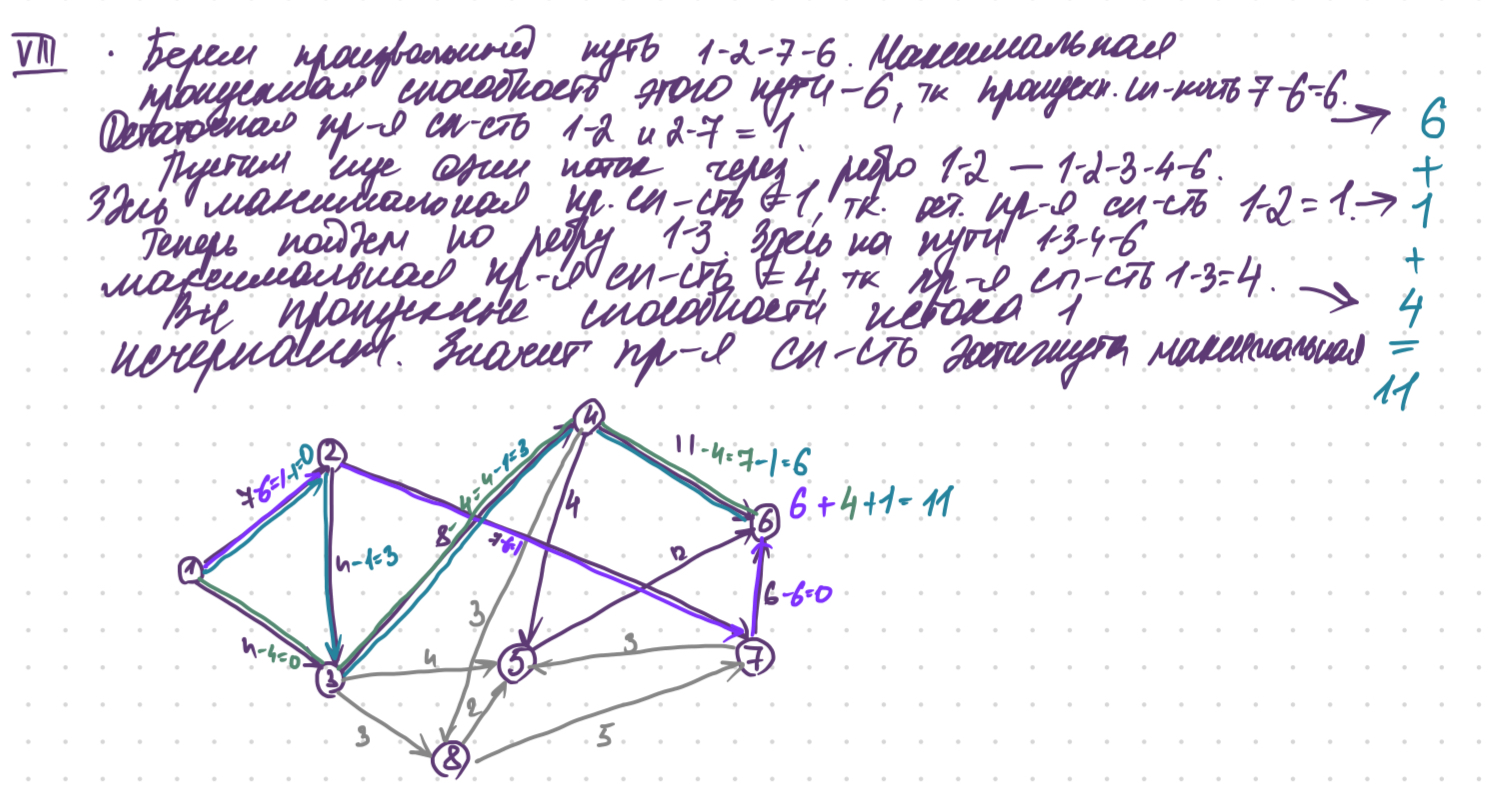

In [31]:
Image('IMG_B53CB3000C1D-1.jpeg')